<h1 style="font-size:3rem;color:black;">Jupyter Notebook Προσομοίωση τοιχοπληρώσεων</h1>

In [37]:
import math as m
import matplotlib.pyplot as plt

# Δεδομένα 



In [38]:

# Διαστάσεις φορέα 
L = 6 # Μήκος ανοίγματος L (m)
H_is = 3.25 # Ύψος ισογείου H (m)
H_or = 4.25 # Ύψος ορόφων H (m)

# Διαστάσεις Δοκών 
h_is = 0.70 # Ύψος δοκού ισογείου Η (m) 
h_or = 0.60 # Ύψος δοκού ορόφου Η (m) 
bw = 0.25 # Πλάτος δοκών b (m) 

# Διαστάσεις Στύλων  
bc_is = hc_is = 0.40 # Πλάτος Στύλοι ισογείου (m)
bc_or = hc_or = 0.35 # Πλάτος Στύλοι ορόφων (m)

# Υλικά 
# Σκυρόδεμα 
fcm = 21.6 # Mpa 
Ecm = 27700 # Mpa

# Φορτία δοκών 
g = 30.80 # kN/m
q = 10.50 # kN/m


## «Ερήμην» Αντιπροσωπευτικές Τιμές Αντοχής Τοιχοπληρώσεων. 

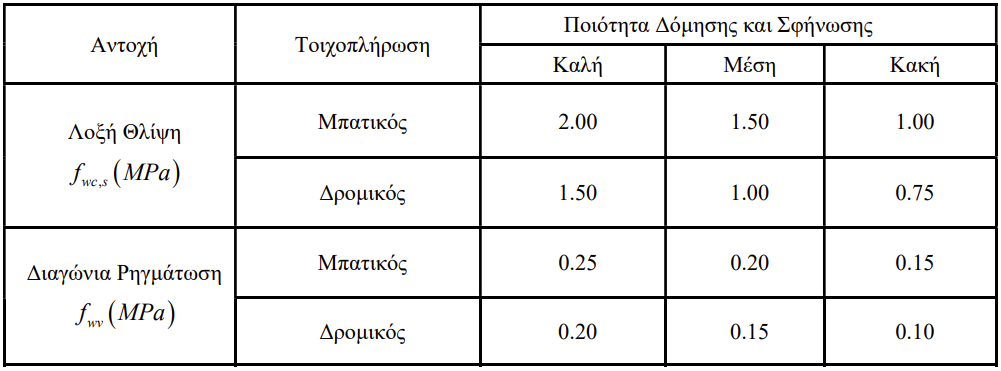

In [39]:

# Στην περίπτωση έλλειψης ακριβέστερων δεδομένων η χαρακτηριστική τιμή της θλιπτικής αντοχής της τοιχοποιίας κατά την κατακόρυφη διεύθυνση Fwc,k κατά τον ΕΚ 6
λm = 1.5 # Συντελεστής μετατροπής της χαρακτηριστικής αντοχής σε μέση
λs = 0.70 # Mειωτικός συντελεστής για την δυσμενή υπό γωνία εφαρμογή του φορτίου (0.60 εώς 0.90 στην περίπτωση που δεν διατίθενται ακριβέστερα στοιχεία)
λc = 1.2 # Aυξητικός συντελεστής για την ευμενή επιρροή της περίσφιγξης την οποίαν εξασφαλίζουν τα περιβάλλοντα την τοιχοπλήρωση δομικά στοιχεία οπλισμένου σκυροδέματος
fbc = 4 # Η θλιπτική αντοχή του τοιχοσώματος (3.1 έως 5.5) Mpa
fmc = 1.6 # Η θλιπτική αντοχή του κονιάματος (1.53 έως 1.75) Mpa
k_t1 = 0.45 # Εμπειρικός συντελεστής, ο οποίος λαμβάνει υπόψη την ομάδα στην οποία κατατάσσονται τα τοιχοσώματα και το είδος του κονιάματος δομήσεως (0.35 εώς 0.55)

# Μέτρο ελαστικότητας
#𝐸𝑚 ≈ 600𝑓𝑤𝑐,𝑠 για στάθμη επιτελεστικότητας Β (Σημαντικές Βλάβες)
#𝛦𝑚 ≈ 900𝑓𝑤𝑐,𝑠 για στάθμη επιτελεστικότητας Α (Περιορισμένες Βλάβες).

k_t2 = 1000 # Εμπειρικός συντελεστής σύμφωνα με τον Ευρωκώδικα 6 (500 εώς 1000 φορές την θλιπτική αντο΄χή)

#Απο τον παραπάνω πίνακα λαμβάνουμε μια μέση τιμή για την Διαγώνια Ρηγμάτωση Fwv
fwv = 0.20 # Mpa

teff = 0.20 # Για ενιαίες κατά την διατομή όσο το t της τοιχοπλήρωσης σύμφωνα με τον Ευρωκώδικα 6 (m)


#Δείκτης πλαστιμότητας μ για τοιχοπληρώσεις
mplast = 2


#γm = 1.7 

#Τοιχοπληρώσεις f m = min ( 1,5 f k , f k + 0,05 ή 0,50 MΡa, για διάτμηση ή λοξή θλίψη, αντιστοίχως)




# Προσομοίωση Τοιχοπλήρωσης σύμφωνα με τον ΚΑΝ.ΕΠΕ.

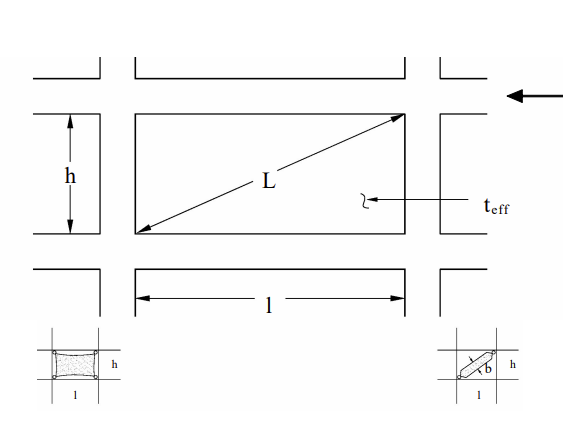

# Υπολογισμός διαστάσεων

In [49]:
#### Διαστάσεις θλιβόμενης ράβδου 
h_t_is = H_is - h_is # Καθαρό ύψος τοιχοπλήρωσης ισογείου h (m)
h_t_or = H_or - h_or # Καθαρό ύψος τοιχοπλήρωσης ορόφου h (m)
l_t_is = L - 2*bc_is # Καθαρό μήκος τοιχοπλήρωσης ισογείου l (m) 
l_t_or = L - 2*bc_or # Καθαρό μήκος τοιχοπλήρωσης ορόφου l (m)

# Διαστάσεις θλιβόμενης Διαγωνίου 

# Μήκος
L_diag_is = m.sqrt((l_t_is**2)+(h_t_is**2)) # Μήκος θλιβόμενης Διαγωνίου ισογείου L (m)
L_diag_or = m.sqrt((l_t_or**2)+(h_t_or**2)) # Μήκος θλιβόμενης Διαγωνίου ορόφου L (m)

#Πλ΄άτος στην περίπτωση στάθμη επιτελεστικότητας Β (Σημαντικές Βλάβες)
b_diag_is = 0.15*L_diag_is # Πλάτος θλιβόμενης Διαγωνίου ισογείου b (m) 
b_diag_or = 0.15*L_diag_or # Πλάτος θλιβόμενης Διαγωνίου ορόφου b (m) 

# Λυγηρότητα της τοιχοποιίας 
lig = L/teff

# Γωνία 
a_is = m.atanh(h_t_is/l_t_is) 
a_or = m.atanh(h_t_or/l_t_or) 




print('Διαστάσεις θλιβόμενης Διαγωνίου :')
print(f'L Διαγωνίου ισογείου = {L_diag_is:.3f}m')
print(f'b Διαγωνίου ισογείου = {b_diag_is:.3f}m')
print(f'L Διαγωνίου ορόφου  = {L_diag_or:.3f}m')
print(f'b Διαγωνίου ορόφου = {b_diag_or:.3f}m')
print(f'Πάχος διαγωνίου ισογείου και ορόφου = {teff:.3f}m')
print(f'Λυγηρότητα της τοιχοποιίας = {lig:.3f}')
print(f'Γωνία α ισογείου= {a_is:.3f}')
print(f'Γωνία α ορόφου= {a_or:.3f}')

Διαστάσεις θλιβόμενης Διαγωνίου :
L Διαγωνίου ισογείου = 5.792m
b Διαγωνίου ισογείου = 0.869m
L Διαγωνίου ορόφου  = 6.435m
b Διαγωνίου ορόφου = 0.965m
Πάχος διαγωνίου ισογείου και ορόφου = 0.200m
Λυγηρότητα της τοιχοποιίας = 30.000
Γωνία α ισογείου= 0.537
Γωνία α ορόφου= 0.845


# Ανάλυση δυνάμεων 

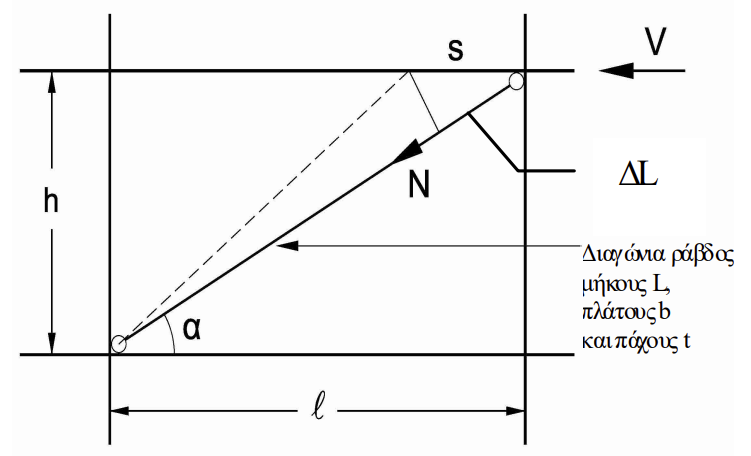

In [41]:
fwcs = λm*λs*λc*k_t1*(fbc**0.7)*(fmc**0.3) # Θλιπτική αντοχή της τοιχοποιίας κατά την κατακόρυφη διεύθυνση (Mpa)

Ew = (660/1000)*fwcs # Gpa

#Το εμβαδόν διατομής της τοιχοράβδου :
Ap_is = b_diag_is*teff # (m^2) (Ισογείου)
Ap_or = b_diag_or*teff # (m^2) (Ορόφου)

#Επιφάνεια φατνώματος :
Af_is = l_t_is*teff # (m^2) (Ισογείου)
Af_or = l_t_or*teff # (m^2) (Ορόφου)

#Η Μέγιστη αξονική θλιπτική δύναμη 
Ny_is = fwcs*Ap_is*1000 # kN (Ισογείου)
Ny_or = fwcs*Ap_or*1000 # kN (Ορόφου)

#Αξονική δύναμη V 
V_is = teff*b_diag_is*fwv*1000 # kN (Ισογείου)
V_or = teff*b_diag_or*fwv*1000 # kN (Ορόφου)



print(f'Μέτρο ελαστικότητας = {Ew:0.3f}Gpa')
print(f'Λοξή Θλίψη τοιχοπλήρωσης = {fwcs:.3f}Mpa')

print(f'Το εμβαδόν διατομής της τοιχοράβδου ισογείου = {Ap_is:0.3f}m^2')
print(f'Το εμβαδόν διατομής της τοιχοράβδου ορόφου = {Ap_or:0.3f}m^2')

print(f'Επιφάνεια φατνώματος = {Af_is:0.3f}m^2')
print(f'Επιφάνεια φατνώματος = {Af_or:0.3f}m^2')

print(f'Η Μέγιστη αξονική θλιπτική δύναμη ράβδου ορόφου = {Ny_or:0.3f}kN')
print(f'Η Μέγιστη αξονική θλιπτική δύναμη ράβδου ισογείου = {Ny_is:0.3f}kN')


Μέτρο ελαστικότητας = 1.137Gpa
Λοξή Θλίψη τοιχοπλήρωσης = 1.723Mpa
Το εμβαδόν διατομής της τοιχοράβδου ισογείου = 0.174m^2
Το εμβαδόν διατομής της τοιχοράβδου ορόφου = 0.193m^2
Επιφάνεια φατνώματος = 1.040m^2
Επιφάνεια φατνώματος = 1.060m^2
Η Μέγιστη αξονική θλιπτική δύναμη ράβδου ορόφου = 332.620kN
Η Μέγιστη αξονική θλιπτική δύναμη ράβδου ισογείου = 299.351kN


# Ανάλυση μετακινήσεων 

In [47]:
#Μέτρο διάτμησης 
G_is = 0.4*Ew # (Ισογείου) *((h_t_is*l_t_is)/L**2)
G_or = 0.15*Ew*((h_t_or*l_t_or)/L**2) # (Ορόφου)
print(f'Δυστένεια ισογείου = {G_is:0.3f}kN')

#Σχέσεις τάσεων – παραμορφώσεων πριν ή κατά τη ρηγμάτωση
taf_is = V_is/(teff*l_t_is) # (Ισογείου)
taf_or = V_or/(teff*l_t_or) # (Ορόφου)

sigma_is = Ny_is/(teff*b_diag_is) # (Ισογείου)
sigma_or = Ny_or/(teff*b_diag_or) # (Ορόφου)

#Η δυστένεια της ισοδύναμης θλιβόμενης ράβδου :
Diste_is = Ew*Ap_is*(m.asin(a_is))*((m.acos(a_is))**2)*10**6 # kN (Ισογείου)  
Diste_or = Ew*Ap_or*(m.asin(a_or))*((m.acos(a_or))**2)*10**6 # kN (Ορόφου) 

#H δυστμησία του φατνώματος
Distm_is = G_is*Af_is # kN (Ισογείου) 
Distm_or = G_or*Af_or # kN (Ισογείου) 

print(f'Δυστένεια ισογείου = {Diste_is:0.3f}kN')
print(f'Δυστένεια ορόφου = {Diste_or:0.3f}kN')
print(f'Δυστμησία ισογείου = {Distm_is:0.3f}kN')
print(f'Δυστμησία ορόφου = {Distm_or:0.3f}kN')


Δυστένεια ισογείου = 0.455kN
Δυστένεια ισογείου = 112891.447kN
Δυστένεια ορόφου = 70199.907kN
Δυστμησία ισογείου = 0.473kN
Δυστμησία ορόφου = 0.097kN


# Διάγραμμα τάσεων - παραμορφώσεων ισοδύναμης θλιβόμενης διαγώνιας ράβδου άοπλης τοιχοπλήρωσης

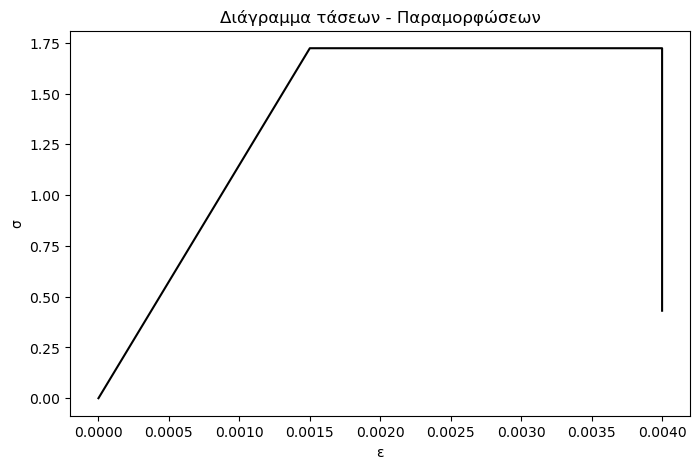

In [43]:
#Διάγραμμα τάσεων - παραμορφώσεων (τιμές απο το ΚΑΝ.ΕΠΕ §7.4.1)
ey = 0.0015 # Παραμόρφωση διαρροής
eu = 0.004 # Παραμόρφωση αστοχίας



#Data 
y = [0, fwcs, fwcs, 0.25*fwcs]
x = [0, ey, eu, eu]

#Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='', linestyle='-',color='0', label="")

# Labels and Title
plt.xlabel("ε")
plt.ylabel("σ")
plt.title("Διάγραμμα τάσεων - Παραμoρφώσεων")
plt.show()






# Προσομοίωση καμπύλη ικανότητας τοιχοπλήρωσης

In [54]:
#Γωνιακή παραμόρφωση στη διαρροή
gy_is = (fwv/G_is) # (Ισογείου)
gy_or = (fwv/G_or) # (Ορόφου)

#Γωνιακή παραμόρφωση στην αστοχία 
gu_is = gy_is*mplast # (Ισογείου)
gu_or = gy_or*mplast # (Ορόφου)

#Οριζόντια μετακίνηση 
dy_is = gy_is*h_t_is # (Ισογείου)
dy_or = gy_or*h_t_or # (Ορόφου)

du_is = gu_is*h_t_is # (Ισογείου)
du_or = gu_or*h_t_or # (Ορόφου)


#Η τέμνουσα αντοχής της τοιχοπλήρωσης
VR_is = teff*l_t_is*fwv*1000 # (Ισογείου)
VR_or = teff*l_t_or*fwv*1000 # (Ορόφου)


print(f'Γωνιακή παραμόρφωση διαρροής Ισογείου = {gy_is/10:0.3f} %')
print(f'Γωνιακή παραμόρφωση στην αστοχία  Ισογείου = {gu_is:0.3f} %')

print(f'Γωνιακή παραμόρφωση διαρροής Ορόφου = {gy_or/10:0.3f} %')
print(f'Γωνιακή παραμόρφωση στην αστοχία Ορόφου = {gu_or:0.3f} %')

print(f'Οριζόντια μετακίνηση Ισογείου = {dy_is:0.5f} mm')
print(f'Οριζόντια μετακίνηση Ισογείου στην αστοχία = {du_is:0.5f} mm')

print(f'Οριζόντια μετακίνηση Ορόφου = {dy_or:0.5f} mm')
print(f'Οριζόντια μετακίνηση Ορόφου στην αστοχία = {du_or:0.5f} mm')

print(f'Τέμνουσα αντοχής Ισογείου = {VR_is:0.3f}')
print(f'Τέμνουσα αντοχής Ορόφου = {VR_or:0.3f}')


Γωνιακή παραμόρφωση διαρροής Ισογείου = 0.044 %
Γωνιακή παραμόρφωση στην αστοχία  Ισογείου = 0.879 %
Γωνιακή παραμόρφωση διαρροής Ορόφου = 0.218 %
Γωνιακή παραμόρφωση στην αστοχία Ορόφου = 4.364 %
Οριζόντια μετακίνηση Ισογείου = 1.12126 mm
Οριζόντια μετακίνηση Ισογείου στην αστοχία = 2.24251 mm
Οριζόντια μετακίνηση Ορόφου = 7.96453 mm
Οριζόντια μετακίνηση Ορόφου στην αστοχία = 15.92907 mm
Τέμνουσα αντοχής Ισογείου = 208.000
Τέμνουσα αντοχής Ορόφου = 212.000


# Διάγραμμα καμπύλης ικανότητας 

# Ισογείου 

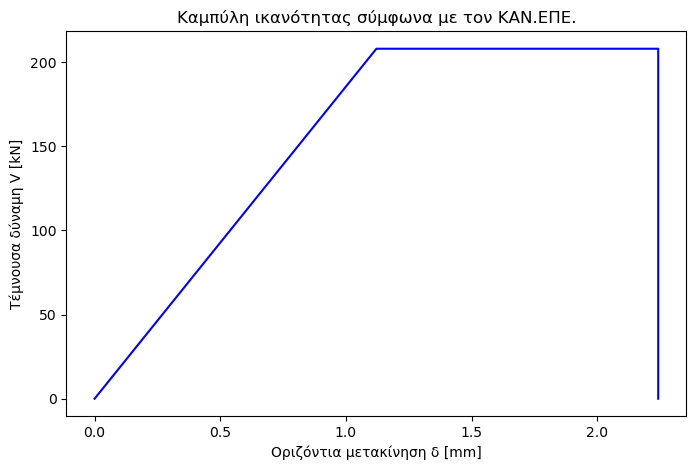

In [57]:
#Data 
y = [0, VR_is, VR_is, 0]
x = [0, dy_is, du_is, du_is]

#Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='', linestyle='-',color='b', label="")

# Labels and Title
plt.xlabel("Οριζόντια μετακίνηση δ [mm]")
plt.ylabel("Τέμνουσα δύναμη V [kN]")
plt.title("Καμπύλη ικανότητας σύμφωνα με τον ΚΑΝ.ΕΠΕ.")
plt.show()











# Ορόφου 

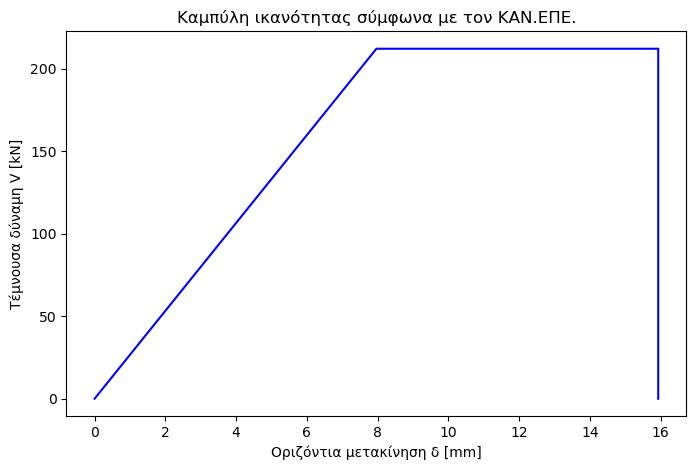

In [58]:
#Data 
y = [0, VR_or, VR_or, 0]
x = [0, dy_or, du_or, du_or]

#Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='', linestyle='-',color='b', label="")

# Labels and Title
plt.xlabel("Οριζόντια μετακίνηση δ [mm]")
plt.ylabel("Τέμνουσα δύναμη V [kN]")
plt.title("Καμπύλη ικανότητας σύμφωνα με τον ΚΑΝ.ΕΠΕ.")
plt.show()

